In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')



In [3]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")


In [4]:
df = pd.read_excel('Online Retail.xlsx')

In [5]:
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
print(df.head(10))

print("\nColumn Names:")
print(df.columns.tolist())

print("\nDataset Info:")
print(df.info())

print("\nBasic Statistics:")
print(df.describe())


Dataset Shape: (541909, 8)

First few rows:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7    536366     22633               HAND WARMER UNION JACK         6   
8    536366     22632            HAND WARMER RED POLKA DOT         6   
9    536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     

In [6]:
column_mapping = {
    'InvoiceNo': 'InvoiceNo',
    'InvoiceDate': 'InvoiceDate',
    'CustomerID': 'CustomerID',
    'StockCode': 'ProductID',
    'Description': 'ProductDescription',
    'Quantity': 'Quantity',
    'UnitPrice': 'UnitPrice'
}

existing_columns = {k: v for k, v in column_mapping.items() if k in df.columns}
df = df.rename(columns=existing_columns)

df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

if 'InvoiceNo' in df.columns:
    df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

df = df.dropna(subset=['CustomerID'])


df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]


df = df[df['Quantity'] < df['Quantity'].quantile(0.99)]
df = df[df['UnitPrice'] < df['UnitPrice'].quantile(0.99)]

print("\n" + "="*50)
print("AFTER CLEANING")
print("="*50)
print(f"Dataset Shape: {df.shape}")
print(f"Date Range: {df['InvoiceDate'].min()} to {df['InvoiceDate'].max()}")
print(f"Unique Customers: {df['CustomerID'].nunique()}")
print(f"Unique Products: {df['ProductID'].nunique()}")
print(f"Total Revenue: ${df['TotalPrice'].sum():,.2f}")


if 'ProductDescription' in df.columns and 'Category' not in df.columns:
    # Simple categorization based on keywords 
    def categorize_product(description):
        if pd.isna(description):
            return 'Other'
        desc = str(description).lower()
        if any(word in desc for word in ['bag', 'case', 'holder']):
            return 'Accessories'
        elif any(word in desc for word in ['light', 'lamp', 'candle']):
            return 'Lighting'
        elif any(word in desc for word in ['decoration', 'ornament', 'sign']):
            return 'Decor'
        elif any(word in desc for word in ['kitchen', 'dish', 'bowl', 'plate']):
            return 'Kitchenware'
        elif any(word in desc for word in ['gift', 'card', 'wrap']):
            return 'Gifts'
        else:
            return 'Other'
    
    df['Category'] = df['ProductDescription'].apply(categorize_product)
elif 'Category' not in df.columns:
    print("\nNote: No category information found. Creating sample categories...")
    categories = ['Electronics', 'Clothing', 'Home & Garden', 'Sports', 'Books']
    df['Category'] = np.random.choice(categories, size=len(df))

print("\nCategory Distribution:")
print(df['Category'].value_counts())

print("\nData Sample After Processing:")
print(df.head())




AFTER CLEANING
Dataset Shape: (388592, 9)
Date Range: 2010-12-01 08:26:00 to 2011-12-09 12:50:00
Unique Customers: 4289
Unique Products: 3615
Total Revenue: $6,778,207.54

Category Distribution:
Category
Other          243193
Accessories     60474
Decor           39292
Gifts           18647
Lighting        16414
Kitchenware     10572
Name: count, dtype: int64

Data Sample After Processing:
  InvoiceNo ProductID                   ProductDescription  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30   
1 2010-12-01 08:26:00

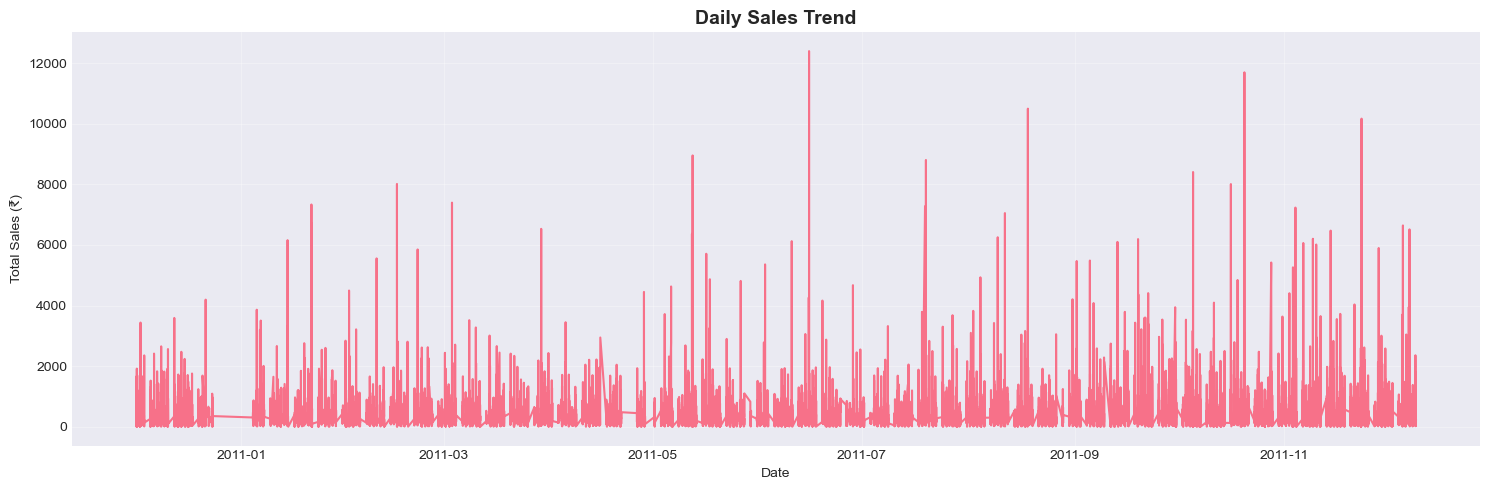

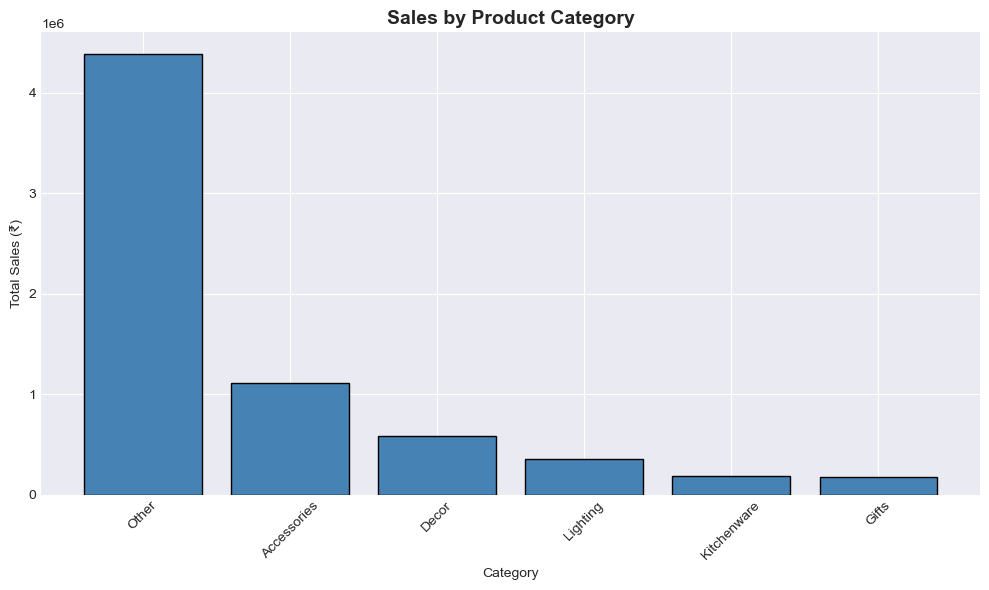

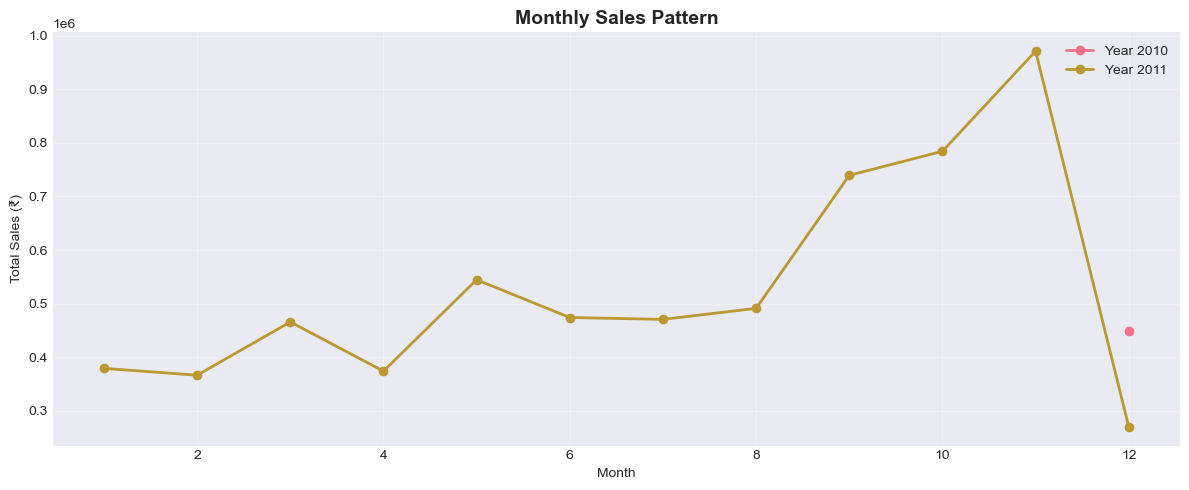

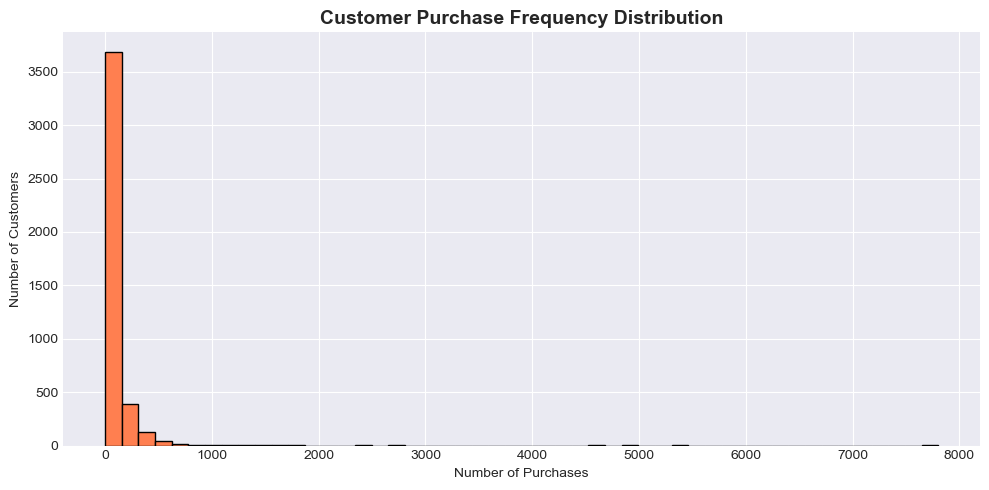


Total Unique Customers: 4289
Total Unique Products: 3615
Average Transaction Value: ₹17.44
Total Revenue: ₹6778207.54


In [7]:
# 1. Sales Distribution Over Time
plt.figure(figsize=(15, 5))
daily_sales = df.groupby('InvoiceDate')['TotalPrice'].sum()
plt.plot(daily_sales.index, daily_sales.values, linewidth=1.5)
plt.title('Daily Sales Trend', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Total Sales (₹)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 2. Category-wise Sales Distribution
plt.figure(figsize=(10, 6))
category_sales = df.groupby('Category')['TotalPrice'].sum().sort_values(ascending=False)
plt.bar(category_sales.index, category_sales.values, color='steelblue', edgecolor='black')
plt.title('Sales by Product Category', fontsize=14, fontweight='bold')
plt.xlabel('Category')
plt.ylabel('Total Sales (₹)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Monthly Sales Pattern
df['Month'] = df['InvoiceDate'].dt.month
df['Year'] = df['InvoiceDate'].dt.year
monthly_sales = df.groupby(['Year', 'Month'])['TotalPrice'].sum().reset_index()

plt.figure(figsize=(12, 5))
for year in monthly_sales['Year'].unique():
    year_data = monthly_sales[monthly_sales['Year'] == year]
    plt.plot(year_data['Month'], year_data['TotalPrice'], marker='o', label=f'Year {year}', linewidth=2)

plt.title('Monthly Sales Pattern', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Total Sales (₹)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 4. Customer Purchase Frequency
customer_freq = df.groupby('CustomerID').size().reset_index(name='PurchaseCount')
plt.figure(figsize=(10, 5))
plt.hist(customer_freq['PurchaseCount'], bins=50, color='coral', edgecolor='black')
plt.title('Customer Purchase Frequency Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

print(f"\nTotal Unique Customers: {df['CustomerID'].nunique()}")
print(f"Total Unique Products: {df['ProductID'].nunique()}")
print(f"Average Transaction Value: ₹{df['TotalPrice'].mean():.2f}")
print(f"Total Revenue: ₹{df['TotalPrice'].sum():.2f}")



In [8]:
print("Missing Values:")
print(df.isnull().sum())

df = df.drop_duplicates()

df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek
df['Quarter'] = df['InvoiceDate'].dt.quarter
df['IsWeekend'] = df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)

# Customer-level features
customer_features = df.groupby('CustomerID').agg({
    'TotalPrice': ['sum', 'mean', 'count'],
    'Quantity': 'sum',
    'InvoiceDate': lambda x: (x.max() - x.min()).days
}).reset_index()

customer_features.columns = ['CustomerID', 'TotalSpent', 'AvgTransactionValue', 
                              'PurchaseFrequency', 'TotalQuantity', 'CustomerLifespanDays']

print("\nCustomer Features Sample:")
print(customer_features.head())

# Product-level features
product_features = df.groupby('ProductID').agg({
    'TotalPrice': 'sum',
    'Quantity': 'sum',
    'CustomerID': 'nunique'
}).reset_index()

product_features.columns = ['ProductID', 'TotalRevenue', 'TotalQuantitySold', 'UniqueCustomers']
product_features = product_features.sort_values('TotalRevenue', ascending=False)

print("\nTop 10 Products by Revenue:")
print(product_features.head(10))

Missing Values:
InvoiceNo             0
ProductID             0
ProductDescription    0
Quantity              0
InvoiceDate           0
UnitPrice             0
CustomerID            0
Country               0
TotalPrice            0
Category              0
Month                 0
Year                  0
dtype: int64

Customer Features Sample:
   CustomerID  TotalSpent  AvgTransactionValue  PurchaseFrequency  \
0     12347.0     4060.40            22.433149                181   
1     12348.0      835.08            52.192500                 16   
2     12349.0     1353.80            19.340000                 70   
3     12350.0      294.40            18.400000                 16   
4     12352.0     1385.74            17.996623                 77   

   TotalQuantity  CustomerLifespanDays  
0           2218                   365  
1            868                   282  
2            625                     0  
3            196                     0  
4            526                   2

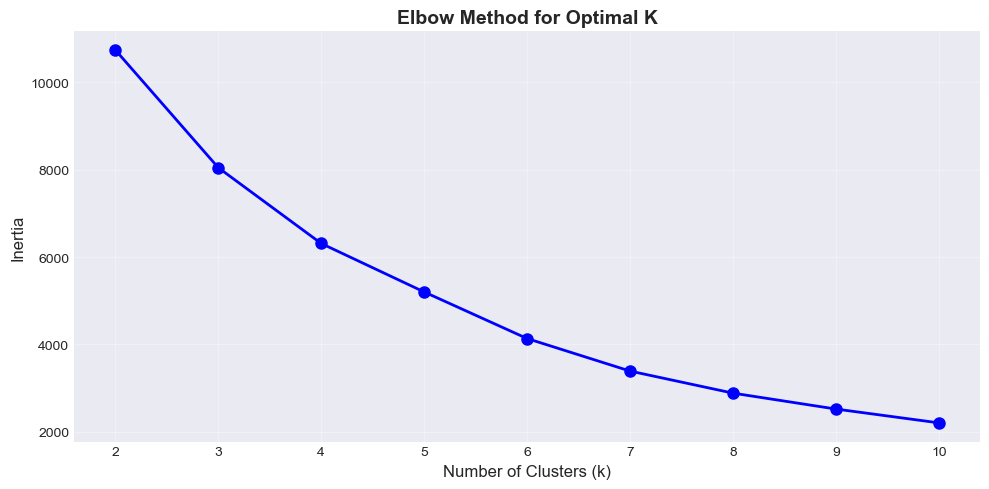

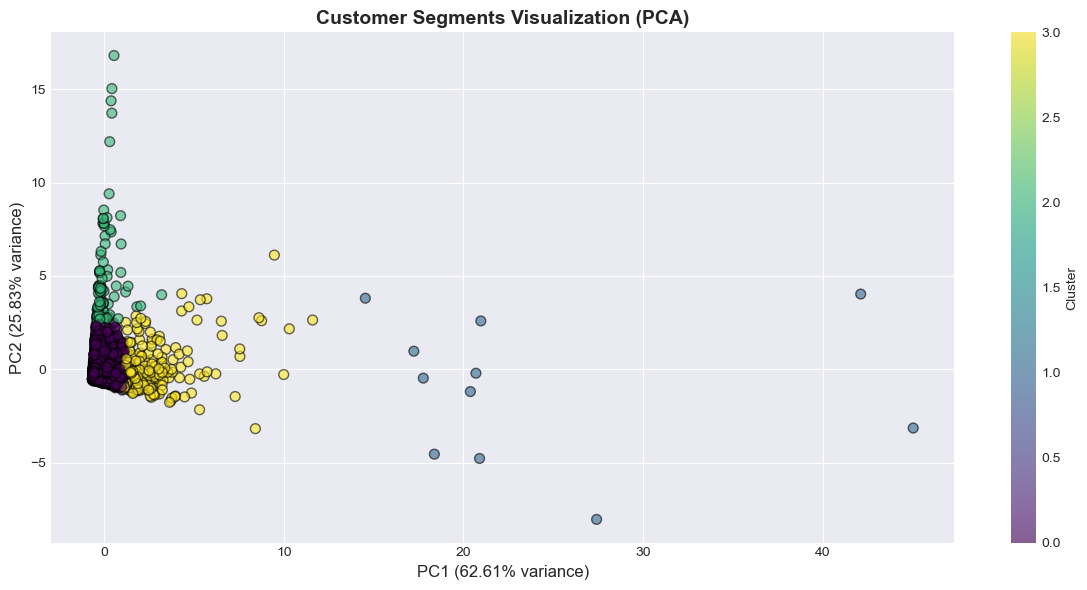


=== Customer Segment Analysis ===
         Avg Total Spent  Avg Transaction Value  Avg Purchase Frequency  \
Cluster                                                                   
0                 926.79                  19.58                   61.48   
1               67061.06                  45.10                 2909.64   
2                1592.29                 196.68                    9.82   
3                8350.56                  29.87                  409.44   

         Number of Customers  
Cluster                       
0                       3916  
1                         11  
2                         94  
3                        268  

=== Segment Distribution ===
Segment
Low-Value Customers       3916
High-Value Customers       268
Medium-Value Customers      94
VIP Customers               11
Name: count, dtype: int64


In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

clustering_features = customer_features[['TotalSpent', 'AvgTransactionValue', 
                                          'PurchaseFrequency', 'TotalQuantity']].copy()

scaler = StandardScaler()
features_scaled = scaler.fit_transform(clustering_features)

inertias = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(features_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.title('Elbow Method for Optimal K', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
customer_features['Cluster'] = kmeans.fit_predict(features_scaled)


pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

plt.figure(figsize=(12, 6))
scatter = plt.scatter(features_pca[:, 0], features_pca[:, 1], 
                     c=customer_features['Cluster'], 
                     cmap='viridis', s=50, alpha=0.6, edgecolors='black')
plt.colorbar(scatter, label='Cluster')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)', fontsize=12)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)', fontsize=12)
plt.title('Customer Segments Visualization (PCA)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Analyze clusters
cluster_analysis = customer_features.groupby('Cluster').agg({
    'TotalSpent': 'mean',
    'AvgTransactionValue': 'mean',
    'PurchaseFrequency': 'mean',
    'CustomerID': 'count'
}).round(2)

cluster_analysis.columns = ['Avg Total Spent', 'Avg Transaction Value', 
                            'Avg Purchase Frequency', 'Number of Customers']

print("\n=== Customer Segment Analysis ===")
print(cluster_analysis)

# Label clusters
cluster_labels = {
    0: 'Low-Value Customers',
    1: 'Medium-Value Customers', 
    2: 'High-Value Customers',
    3: 'VIP Customers'
}


sorted_clusters = cluster_analysis.sort_values('Avg Total Spent')
for i, (idx, row) in enumerate(sorted_clusters.iterrows()):
    cluster_labels[idx] = ['Low-Value', 'Medium-Value', 'High-Value', 'VIP'][i] + ' Customers'

customer_features['Segment'] = customer_features['Cluster'].map(cluster_labels)

print("\n=== Segment Distribution ===")
print(customer_features['Segment'].value_counts())


Defaulting to user installation because normal site-packages is not writeable
Training data points: 16764


03:53:15 - cmdstanpy - INFO - Chain [1] start processing
03:53:18 - cmdstanpy - INFO - Chain [1] done processing


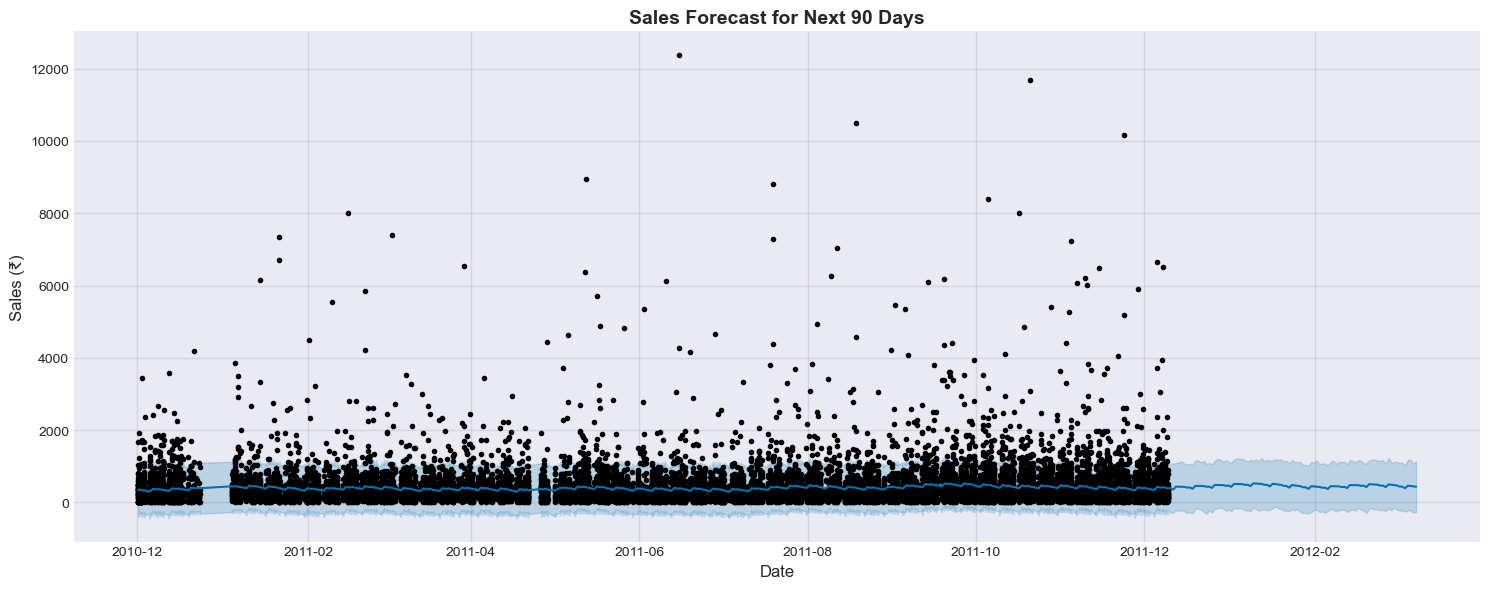

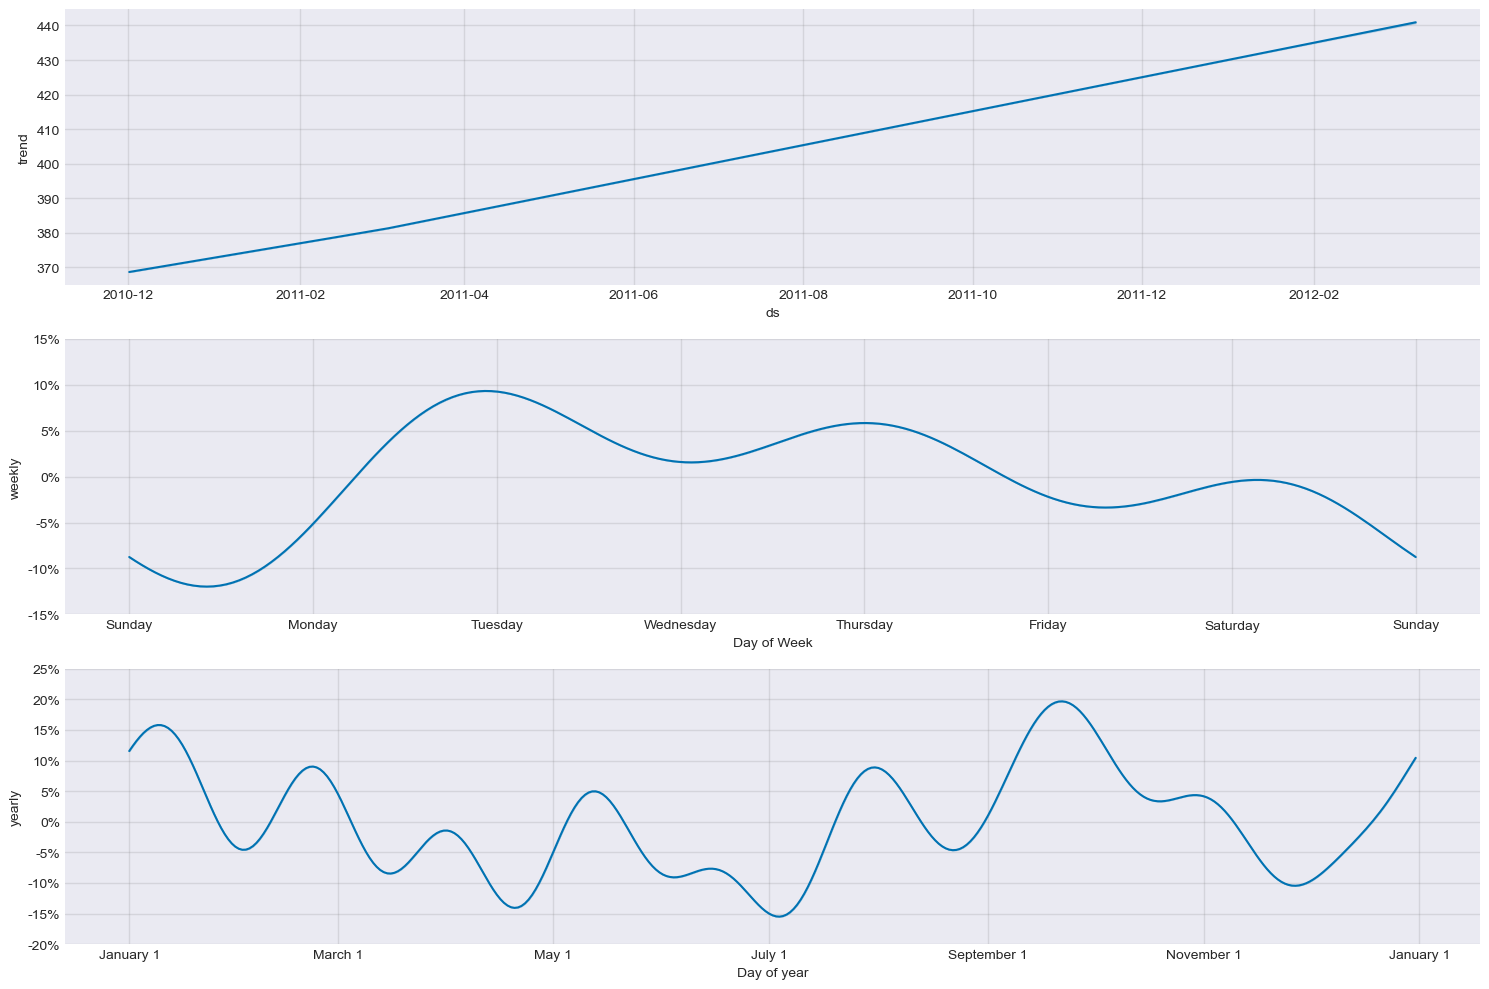


=== Sales Forecast (Next 30 Days) ===
                       ds        yhat  yhat_lower   yhat_upper
16764 2011-12-10 12:50:00  392.911950 -285.522372  1074.622226
16765 2011-12-11 12:50:00  356.292353 -289.106834  1072.244685
16766 2011-12-12 12:50:00  434.523034 -210.049025  1084.633999
16767 2011-12-13 12:50:00  432.007402 -236.835817  1109.644941
16768 2011-12-14 12:50:00  430.294826 -212.622216  1132.534366
16769 2011-12-15 12:50:00  428.016850 -249.372875  1068.874377
16770 2011-12-16 12:50:00  407.728984 -293.267153  1050.321082
16771 2011-12-17 12:50:00  412.201327 -273.008092  1064.571892
16772 2011-12-18 12:50:00  375.843567 -300.154518  1037.696051
16773 2011-12-19 12:50:00  454.706075 -174.944990  1157.936214

=== Forecast Model Performance ===
Mean Absolute Error (MAE): ₹270.53
Root Mean Squared Error (RMSE): ₹524.46
R² Score: 0.0073

=== Purchase Prediction Model Performance ===
Accuracy: 1.0000

Classification Report:
                   precision    recall  f1-score   s

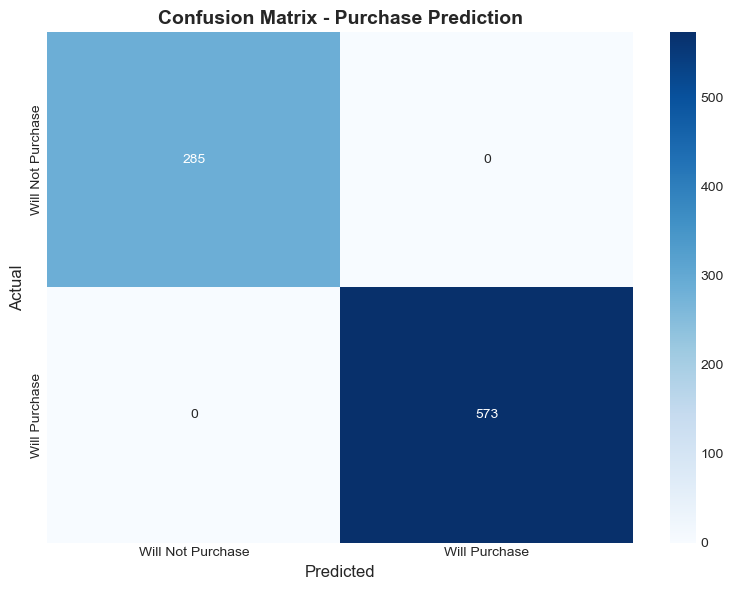

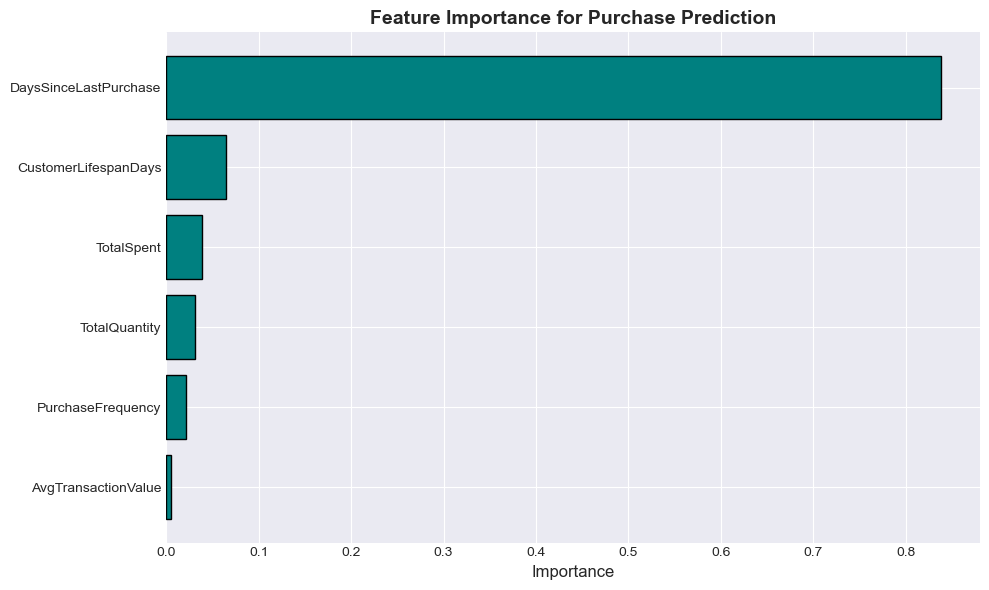


=== Feature Importance ===
                 Feature  Importance
5  DaysSinceLastPurchase    0.838515
4   CustomerLifespanDays    0.064480
0             TotalSpent    0.038196
3          TotalQuantity    0.031418
2      PurchaseFrequency    0.021785
1    AvgTransactionValue    0.005606


In [10]:
!pip install prophet

from prophet import Prophet

forecast_data = df.groupby('InvoiceDate')['TotalPrice'].sum().reset_index()
forecast_data.columns = ['ds', 'y']  # Prophet requires 'ds' and 'y' columns

print(f"Training data points: {len(forecast_data)}")

model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    seasonality_mode='multiplicative'
)

model.fit(forecast_data)

future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)

# Visualize forecast
fig = model.plot(forecast, figsize=(15, 6))
plt.title('Sales Forecast for Next 90 Days', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sales (₹)', fontsize=12)
plt.tight_layout()
plt.show()

fig = model.plot_components(forecast, figsize=(15, 10))
plt.tight_layout()
plt.show()

future_30_days = forecast[forecast['ds'] > forecast_data['ds'].max()].head(30)
print("\n=== Sales Forecast (Next 30 Days) ===")
print(future_30_days[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(10))

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

historical_forecast = forecast[forecast['ds'].isin(forecast_data['ds'])]
merged = forecast_data.merge(historical_forecast[['ds', 'yhat']], on='ds')

mae = mean_absolute_error(merged['y'], merged['yhat'])
rmse = np.sqrt(mean_squared_error(merged['y'], merged['yhat']))
r2 = r2_score(merged['y'], merged['yhat'])

print(f"\n=== Forecast Model Performance ===")
print(f"Mean Absolute Error (MAE): ₹{mae:.2f}")
print(f"Root Mean Squared Error (RMSE): ₹{rmse:.2f}")
print(f"R² Score: {r2:.4f}")


### 4.3 Purchase Prediction using Random Forest


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

customer_last_purchase = df.groupby('CustomerID')['InvoiceDate'].max().reset_index()
customer_last_purchase.columns = ['CustomerID', 'LastPurchaseDate']

customer_model_data = customer_features.merge(customer_last_purchase, on='CustomerID')

max_date = df['InvoiceDate'].max()
customer_model_data['DaysSinceLastPurchase'] = (max_date - customer_model_data['LastPurchaseDate']).dt.days
customer_model_data['WillPurchase'] = (customer_model_data['DaysSinceLastPurchase'] <= 90).astype(int)

feature_cols = ['TotalSpent', 'AvgTransactionValue', 'PurchaseFrequency', 
                'TotalQuantity', 'CustomerLifespanDays', 'DaysSinceLastPurchase']

X = customer_model_data[feature_cols]
y = customer_model_data['WillPurchase']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

print("\n=== Purchase Prediction Model Performance ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Will Not Purchase', 'Will Purchase']))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Will Not Purchase', 'Will Purchase'],
            yticklabels=['Will Not Purchase', 'Will Purchase'])
plt.title('Confusion Matrix - Purchase Prediction', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.tight_layout()
plt.show()

# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='teal', edgecolor='black')
plt.xlabel('Importance', fontsize=12)
plt.title('Feature Importance for Purchase Prediction', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\n=== Feature Importance ===")
print(feature_importance)

In [11]:
print("\n=== KEY INSIGHTS AND PREDICTIONS ===\n")

# 1. Top Customer Segments
print("1. CUSTOMER SEGMENTATION INSIGHTS:")
for segment in cluster_labels.values():
    segment_data = customer_features[customer_features['Segment'] == segment]
    print(f"\n{segment}:")
    print(f"  - Count: {len(segment_data)} customers")
    print(f"  - Avg Spending: ₹{segment_data['TotalSpent'].mean():.2f}")
    print(f"  - Avg Frequency: {segment_data['PurchaseFrequency'].mean():.1f} purchases")

# 2. Sales Forecast Summary
print("\n\n2. SALES FORECAST INSIGHTS:")
next_week_forecast = forecast[forecast['ds'] > max_date].head(7)
print(f"  - Expected sales next week: ₹{next_week_forecast['yhat'].sum():.2f}")
print(f"  - Predicted daily average: ₹{next_week_forecast['yhat'].mean():.2f}")
print(f"  - Peak sales day: {next_week_forecast.loc[next_week_forecast['yhat'].idxmax(), 'ds'].strftime('%A')}")

# 3. High-Risk Churn Customers
print("\n\n3. CUSTOMER RETENTION INSIGHTS:")
churn_risk = customer_model_data[customer_model_data['WillPurchase'] == 0]
high_value_churn = churn_risk[churn_risk['TotalSpent'] > churn_risk['TotalSpent'].quantile(0.75)]
print(f"  - High-value customers at risk: {len(high_value_churn)}")
print(f"  - Potential revenue loss: ₹{high_value_churn['TotalSpent'].sum():.2f}")
print(f"  - Recommendation: Launch re-engagement campaign")

# 4. Product Category Insights
print("\n\n4. PRODUCT CATEGORY INSIGHTS:")
category_performance = df.groupby('Category').agg({
    'TotalPrice': 'sum',
    'Quantity': 'sum'
}).sort_values('TotalPrice', ascending=False)
print(category_performance)





=== KEY INSIGHTS AND PREDICTIONS ===

1. CUSTOMER SEGMENTATION INSIGHTS:

Low-Value Customers:
  - Count: 3916 customers
  - Avg Spending: ₹926.79
  - Avg Frequency: 61.5 purchases

VIP Customers:
  - Count: 11 customers
  - Avg Spending: ₹67061.06
  - Avg Frequency: 2909.6 purchases

Medium-Value Customers:
  - Count: 94 customers
  - Avg Spending: ₹1592.29
  - Avg Frequency: 9.8 purchases

High-Value Customers:
  - Count: 268 customers
  - Avg Spending: ₹8350.56
  - Avg Frequency: 409.4 purchases


2. SALES FORECAST INSIGHTS:
  - Expected sales next week: ₹2881.78
  - Predicted daily average: ₹411.68
  - Peak sales day: Monday


3. CUSTOMER RETENTION INSIGHTS:
  - High-value customers at risk: 357
  - Potential revenue loss: ₹471704.95
  - Recommendation: Launch re-engagement campaign


4. PRODUCT CATEGORY INSIGHTS:
              TotalPrice  Quantity
Category                          
Other        4365414.614   2083318
Accessories  1104590.960    727347
Decor         577263.960    4

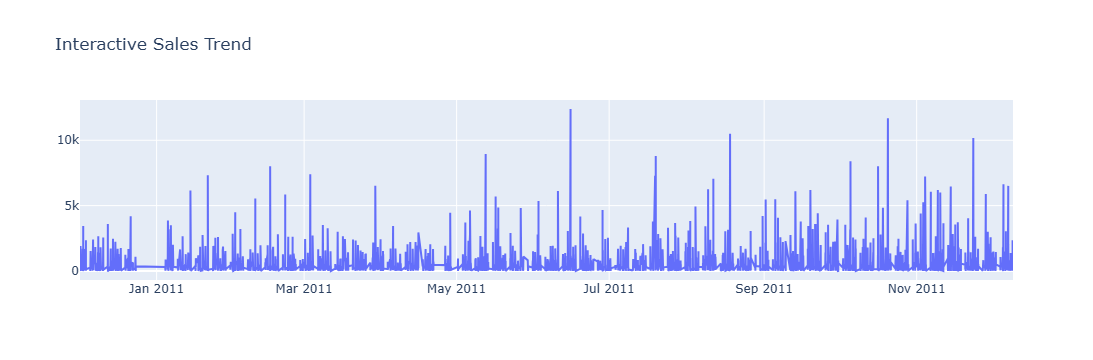

In [15]:
# INTERATIVE SALES TREND
import plotly.graph_objects as go

# Interactive sales chart
fig = go.Figure()
fig.add_trace(go.Scatter(x=daily_sales.index, y=daily_sales.values, 
                         mode='lines', name='Sales'))
fig.update_layout(title='Interactive Sales Trend ',
                  hovermode='x unified')
fig.show()

In [13]:
# Interactive data viewer
from IPython.display import display
import pandas as pd

print("Customer Segments Overview:")
display(customer_features.groupby('Segment').agg({
    'TotalSpent': ['mean', 'sum', 'count']
}))

Customer Segments Overview:


TotalSpent                   
                                mean          sum count
Segment                                                
High-Value Customers     8350.561418  2237950.460   268
Low-Value Customers       926.788484  3629303.704  3916
Medium-Value Customers   1592.288830   149675.150    94
VIP Customers           67061.056364   737671.620    11